In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys  
sys.path.insert(0, '../src/')
import utils

In [3]:
tools = utils.tools()

In [4]:
# tools.readfile('../data/processed/epi_vector.h5')

In [5]:
epi_data_df = tools.readfile('../data/processed/epi_vector.h5')
epi_data_df = tools.df

In [73]:
sample_df = epi_data_df.head(10000)
# sample_df
# list(sample_df.columns.values)

In [74]:
sample_df = sample_df.loc[:, (sample_df != 0).any(axis=0)]
sample_df.shape

(10000, 7305)

In [75]:
sample_df.head()

,""" > panko (japanese bread crumb bread crumb",""" biscuit cutter",""" brown candy "" sugar brown sugar",""" cauliflower floret (cut from 1 large head)",""" cube salt pork",""" large "" egg",""" pie dish",""" piece (about 6 ounce) thick - cut smoke bacon",""" piece ginger, peel, finely grated",""" pita bread",...,zucchini squash,zucchini zucchini,"zucchini, quarter lengthwise then slice across thinly",zucchinis,avg_rating,best_rating,prepare_again_rating,num_reviews,tags,title
http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.5,4.0,0.85,25.0,"[Cheese, Vegetable, No-Cook, Vegetarian, Quick...","""Adult"" Pimiento Cheese"
http://www.epicurious.com/recipes/food/views/-an-apple-a-day-51133430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.5,4.0,0.67,3.0,"[Ginger, Dessert, Bake, Apple, Almond, Fall, R...","""An Apple a Day"""
http://www.epicurious.com/recipes/food/views/-blanketed-eggplant-305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,4.0,0.75,4.0,"[Tomato, Vegetable, Appetizer, Side, Vegetaria...","""Blanketed"" Eggplant"
http://www.epicurious.com/recipes/food/views/-bloody-mary-tomato-toast-with-celery-and-horseradish-56389813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,4.0,1.00,2.0,"[Condiment/Spread, Tomato, Appetizer, Kid-Frie...","""Bloody Mary"" Tomato Toast with Celery and Hor..."
http://www.epicurious.com/recipes/food/views/-bow-tie-pasta-with-zucchini-101932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.5,4.0,0.93,48.0,"[Pasta, Vegetarian, Quick & Easy, Dinner, Basi...","""Bow-Tie"" Pasta with Zucchini"


In [12]:
columns = ['avg_rating','best_rating','worst_rating','prepare_again_rating','num_reviews','total_time', 'tags', 'title']
df = sample_df.copy()
for col in sample_df.columns:
    if col not in columns:
        df.loc[df[col] > 0, col] = 1
df.head(25)

,""" piece ginger, peel, finely grated",""" round cookie or biscuit cutter leaf - shape or round cookie cutter",""" round cutter",(14-ounce) can Eagle Brand sweeten condense milk,(60ml) amaretto or almond liqueur,(generous) ground clove,(pack) light brown sugar,- grind polenta or cornmeal,- thick) diagonal slice of baguette,Aleppo pepper red pepper flake,...,yogurt,yuzu juice,za'atar,zucchini,avg_rating,best_rating,prepare_again_rating,num_reviews,tags,title
http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.5,4.0,0.85,25.0,"[Cheese, Vegetable, No-Cook, Vegetarian, Quick...","""Adult"" Pimiento Cheese"
http://www.epicurious.com/recipes/food/views/-an-apple-a-day-51133430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.5,4.0,0.67,3.0,"[Ginger, Dessert, Bake, Apple, Almond, Fall, R...","""An Apple a Day"""
http://www.epicurious.com/recipes/food/views/-blanketed-eggplant-305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,4.0,0.75,4.0,"[Tomato, Vegetable, Appetizer, Side, Vegetaria...","""Blanketed"" Eggplant"
http://www.epicurious.com/recipes/food/views/-bloody-mary-tomato-toast-with-celery-and-horseradish-56389813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,4.0,1.00,2.0,"[Condiment/Spread, Tomato, Appetizer, Kid-Frie...","""Bloody Mary"" Tomato Toast with Celery and Hor..."
http://www.epicurious.com/recipes/food/views/-bow-tie-pasta-with-zucchini-101932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.5,4.0,0.93,48.0,"[Pasta, Vegetarian, Quick & Easy, Dinner, Basi...","""Bow-Tie"" Pasta with Zucchini"
http://www.epicurious.com/recipes/food/views/-burnt-carrots-and-parsnips-56390131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.5,4.0,1.00,2.0,"[Roast, Low Fat, Vegetarian, Kid-Friendly, Hig...","""Burnt"" Carrots and Parsnips"
http://www.epicurious.com/recipes/food/views/-california-roll-salad-12246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.5,4.0,0.95,83.0,"[Salad, Ginger, Rice, Vegetable, Side, Vegetar...","""California Roll"" Salad"
http://www.epicurious.com/recipes/food/views/-candy-corn-frozen-citrus-cream-pops-368770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,4.0,0.00,1.0,"[Milk/Cream, Dessert, Freeze/Chill, Vegetarian...","""Candy Corn"" Frozen Citrus Cream Pops"
http://www.epicurious.com/recipes/food/views/-cannoli-ice-cream-sandwiches-242004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,4.0,1.00,1.0,"[Chocolate, Dessert, Freeze/Chill, Picnic, Veg...","""Cannoli"" Ice Cream Sandwiches"
http://www.epicurious.com/recipes/food/views/-chickpea-barley-and-feta-salad-51239040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.5,4.0,0.73,22.0,"[Salad, Side, Feta, Barley, Green Bean, Chickp...","Chickpea, Barley, and Feta Salad"


In [76]:
from collections import Counter
c = Counter()  
sample_df["tags"].apply(lambda x: c.update(x))
print(c)

Counter({'Peanut Free': 4981, 'Soy Free': 4873, 'Bon Appétit': 4372, 'Vegetarian': 4075, 'Tree Nut Free': 4072, 'Kosher': 3844, 'Pescatarian': 3721, 'Gourmet': 3113, 'Bake': 2724, 'Wheat/Gluten-Free': 2712, 'Quick & Easy': 2595, 'Dessert': 2525, 'Kidney Friendly': 1787, 'Summer': 1752, 'Dairy Free': 1590, 'Fall': 1587, 'Side': 1560, 'Winter': 1512, 'No Sugar Added': 1508, 'Dinner': 1301, 'Kid-Friendly': 1280, 'Sugar Conscious': 1267, 'Small Plates': 1255, 'Milk/Cream': 1048, 'Healthy': 1016, 'Chocolate': 945, 'Chicken': 930, 'Vegan': 923, 'Egg': 918, 'Vegetable': 911, 'Fruit': 865, 'Onion': 831, 'Appetizer': 811, 'Dairy': 792, 'Sauté': 779, 'Thanksgiving': 770, 'Tomato': 716, 'Spring': 700, 'Soup/Stew': 694, 'Salad': 672, 'Lunch': 632, 'Christmas': 623, 'Chill': 615, 'Cheese': 602, 'Cocktail Party': 598, 'Brunch': 575, 'Garlic': 550, 'Breakfast': 544, 'Drink': 530, 'High Fiber': 520, 'Herb': 511, 'Cake': 509, 'Low Cal': 498, 'Party': 485, 'No-Cook': 479, 'Nut': 470, 'Apple': 463, 'Food

In [77]:
# store in df
count = pd.DataFrame()
count['tags_count'] = [c[i] for i in c]
count['tag'] = [i for i in c]
count = count.sort_values(by='tags_count',ascending=False)

# delete row with value < n
indexNames = count[ count['tags_count'] <= 30 ].index
 
# Delete these row indexes from dataFrame
count.drop(indexNames , inplace=True)
count

,tags_count,tag
19,4981,Peanut Free
20,4873,Soy Free
17,4372,Bon Appétit
3,4075,Vegetarian
34,4072,Tree Nut Free
...,...,...
123,31,Veal
212,31,Cookie
539,31,Beef Rib
354,31,New York


In [78]:
# look for ### Free tags
count['allergy_tags'] = count['tag'].str.endswith('Free')

allergy_df = count[count['allergy_tags'] == True]
allergy_df

,tags_count,tag,allergy_tags
19,4981,Peanut Free,True
20,4873,Soy Free,True
34,4072,Tree Nut Free,True
57,2712,Wheat/Gluten-Free,True
33,1590,Dairy Free,True
288,208,Fat Free,True


In [79]:
for i in allergy_df.tag:
    sample_df[i] = [i in tags for tags in sample_df.tags]

In [80]:
sample_df.head()

,""" > panko (japanese bread crumb bread crumb",""" biscuit cutter",""" brown candy "" sugar brown sugar",""" cauliflower floret (cut from 1 large head)",""" cube salt pork",""" large "" egg",""" pie dish",""" piece (about 6 ounce) thick - cut smoke bacon",""" piece ginger, peel, finely grated",""" pita bread",...,prepare_again_rating,num_reviews,tags,title,Peanut Free,Soy Free,Tree Nut Free,Wheat/Gluten-Free,Dairy Free,Fat Free
http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.85,25.0,"[Cheese, Vegetable, No-Cook, Vegetarian, Quick...","""Adult"" Pimiento Cheese",False,False,False,False,False,False
http://www.epicurious.com/recipes/food/views/-an-apple-a-day-51133430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.67,3.0,"[Ginger, Dessert, Bake, Apple, Almond, Fall, R...","""An Apple a Day""",True,True,False,False,False,False
http://www.epicurious.com/recipes/food/views/-blanketed-eggplant-305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.75,4.0,"[Tomato, Vegetable, Appetizer, Side, Vegetaria...","""Blanketed"" Eggplant",False,False,False,False,False,False
http://www.epicurious.com/recipes/food/views/-bloody-mary-tomato-toast-with-celery-and-horseradish-56389813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,2.0,"[Condiment/Spread, Tomato, Appetizer, Kid-Frie...","""Bloody Mary"" Tomato Toast with Celery and Hor...",True,True,True,False,True,False
http://www.epicurious.com/recipes/food/views/-bow-tie-pasta-with-zucchini-101932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.93,48.0,"[Pasta, Vegetarian, Quick & Easy, Dinner, Basi...","""Bow-Tie"" Pasta with Zucchini",True,True,True,False,False,False


In [81]:
# drop not relevent columns
sample_df = sample_df.drop(columns=['avg_rating','best_rating','prepare_again_rating','num_reviews'],axis=0)

sample_df = sample_df.drop(columns=['Soy Free','Tree Nut Free','Wheat/Gluten-Free','Dairy Free'],axis=0)

sample_df.head(2)

,""" > panko (japanese bread crumb bread crumb",""" biscuit cutter",""" brown candy "" sugar brown sugar",""" cauliflower floret (cut from 1 large head)",""" cube salt pork",""" large "" egg",""" pie dish",""" piece (about 6 ounce) thick - cut smoke bacon",""" piece ginger, peel, finely grated",""" pita bread",...,"zucchini blossom, tear into large piece (optional)",zucchini flower,zucchini squash,zucchini zucchini,"zucchini, quarter lengthwise then slice across thinly",zucchinis,tags,title,Peanut Free,Fat Free
http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"[Cheese, Vegetable, No-Cook, Vegetarian, Quick...","""Adult"" Pimiento Cheese",False,False
http://www.epicurious.com/recipes/food/views/-an-apple-a-day-51133430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"[Ginger, Dessert, Bake, Apple, Almond, Fall, R...","""An Apple a Day""",True,False


In [82]:
sample_df = sample_df.drop(columns=['Fat Free'],axis=0)
sample_df.head(25)

,""" > panko (japanese bread crumb bread crumb",""" biscuit cutter",""" brown candy "" sugar brown sugar",""" cauliflower floret (cut from 1 large head)",""" cube salt pork",""" large "" egg",""" pie dish",""" piece (about 6 ounce) thick - cut smoke bacon",""" piece ginger, peel, finely grated",""" pita bread",...,zucchini blossom,"zucchini blossom, tear into large piece (optional)",zucchini flower,zucchini squash,zucchini zucchini,"zucchini, quarter lengthwise then slice across thinly",zucchinis,tags,title,Peanut Free
http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Cheese, Vegetable, No-Cook, Vegetarian, Quick...","""Adult"" Pimiento Cheese",False
http://www.epicurious.com/recipes/food/views/-an-apple-a-day-51133430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Ginger, Dessert, Bake, Apple, Almond, Fall, R...","""An Apple a Day""",True
http://www.epicurious.com/recipes/food/views/-blanketed-eggplant-305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Tomato, Vegetable, Appetizer, Side, Vegetaria...","""Blanketed"" Eggplant",False
http://www.epicurious.com/recipes/food/views/-bloody-mary-tomato-toast-with-celery-and-horseradish-56389813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Condiment/Spread, Tomato, Appetizer, Kid-Frie...","""Bloody Mary"" Tomato Toast with Celery and Hor...",True
http://www.epicurious.com/recipes/food/views/-bow-tie-pasta-with-zucchini-101932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Pasta, Vegetarian, Quick & Easy, Dinner, Basi...","""Bow-Tie"" Pasta with Zucchini",True
http://www.epicurious.com/recipes/food/views/-burnt-carrots-and-parsnips-56390131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Roast, Low Fat, Vegetarian, Kid-Friendly, Hig...","""Burnt"" Carrots and Parsnips",False
http://www.epicurious.com/recipes/food/views/-california-roll-salad-12246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Salad, Ginger, Rice, Vegetable, Side, Vegetar...","""California Roll"" Salad",False
http://www.epicurious.com/recipes/food/views/-candy-corn-frozen-citrus-cream-pops-368770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Milk/Cream, Dessert, Freeze/Chill, Vegetarian...","""Candy Corn"" Frozen Citrus Cream Pops",True
http://www.epicurious.com/recipes/food/views/-cannoli-ice-cream-sandwiches-242004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Chocolate, Dessert, Freeze/Chill, Picnic, Veg...","""Cannoli"" Ice Cream Sandwiches",True
http://www.epicurious.com/recipes/food/views/-chickpea-barley-and-feta-salad-51239040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Salad, Side, Feta, Barley, Green Bean, Chickp...","Chickpea, Barley, and Feta Salad",True


In [83]:
# Seperate data from attribute we will used to classify, 
# which is class.
sample_df = sample_df[(sample_df != np.inf).all(axis=1)]
X = sample_df.drop(columns=['Peanut Free','tags','title'], axis=1)
Y = sample_df['Peanut Free']
print(Y.head(1))
#X = X.astype('int32')
X.head(25)

http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852    False
Name: Peanut Free, dtype: bool


,""" > panko (japanese bread crumb bread crumb",""" biscuit cutter",""" brown candy "" sugar brown sugar",""" cauliflower floret (cut from 1 large head)",""" cube salt pork",""" large "" egg",""" pie dish",""" piece (about 6 ounce) thick - cut smoke bacon",""" piece ginger, peel, finely grated",""" pita bread",...,ziti pasta,zucchini,"zucchini (about 5 medium), slice thin",zucchini blossom,"zucchini blossom, tear into large piece (optional)",zucchini flower,zucchini squash,zucchini zucchini,"zucchini, quarter lengthwise then slice across thinly",zucchinis
http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/-an-apple-a-day-51133430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/-blanketed-eggplant-305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/-bloody-mary-tomato-toast-with-celery-and-horseradish-56389813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/-bow-tie-pasta-with-zucchini-101932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/-burnt-carrots-and-parsnips-56390131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/-california-roll-salad-12246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/-candy-corn-frozen-citrus-cream-pops-368770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/-cannoli-ice-cream-sandwiches-242004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/-chickpea-barley-and-feta-salad-51239040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
tools.setSearchWord("Breakfast")
tools.search(sample_df)
# tools.tag = 

,""" 00 "" (soft wheat) flour * or cake flour",""" 00 "" flour",""" 00 "" flour, divide",""" > chicken stock chicken broth",""" > panko (japanese bread crumb bread crumb",""" baby "" Pattypan squash",""" biscuit cutter",""" brown candy "" sugar brown sugar",""" cauliflower floret (cut from 1 large head)",""" circular wire rack",...,ﬁne dry bread crumb,ﬁne salt,avg_rating,best_rating,worst_rating,prepare_again_rating,num_reviews,total_time,tags,title
http://www.epicurious.com/recipes/food/views/-chickpea-pancakes-with-leeks-squash-and-yogurt-51260630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.5,4.0,0.0,0.88,8.0,0.0,"[Breakfast, Brunch, Kid-Friendly, Legume, Butt...","Chickpea Pancakes with Leeks, Squash, and Yogurt"
http://www.epicurious.com/recipes/food/views/-lentils-with-cucumbers-chard-and-poached-egg-51260640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.5,4.0,0.0,1.00,7.0,0.0,"[Egg, Breakfast, Brunch, Low Carb, Low Fat, Ki...","Lentils with Cucumbers, Chard, and Poached Egg"
http://www.epicurious.com/recipes/food/views/-smoked-salmon-breakfast-salad-with-crispbread-51260620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,4.0,0.0,1.00,5.0,0.0,"[Leafy Green, Breakfast, Brunch, Quick & Easy,...",Smoked Salmon Breakfast Salad with Crispbread
http://www.epicurious.com/recipes/food/views/3-ingredient-buttermilk-biscuits,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,4.0,0.0,1.00,1.0,0.0,"[3-Ingredient Recipes, Breakfast, Bread, Biscu...",3-Ingredient Buttermilk Biscuits
http://www.epicurious.com/recipes/food/views/3-ingredient-morning-buns,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,4.0,0.0,1.00,1.0,0.0,"[3-Ingredient Recipes, Orange, Breakfast, Bake...",3-Ingredient Morning Buns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.epicurious.com/recipes/food/views/cranberry-pecan-streusel-muffins-240343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,4.0,0.0,0.87,16.0,0.0,"[Bread, Berry, Dairy, Fruit, Nut, Breakfast, B...",Cranberry Pecan Streusel Muffins
http://www.epicurious.com/recipes/food/views/cranberry-quince-and-pearl-onion-compote-350642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,4.0,0.0,1.00,4.0,0.0,"[Onion, Breakfast, Side, Thanksgiving, Cranber...","Cranberry, Quince, and Pearl Onion Compote"
http://www.epicurious.com/recipes/food/views/cranberry-studded-creme-fraiche-scones-5778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,4.0,0.0,0.85,17.0,0.0,"[Bread, Fruit, Breakfast, Brunch, Bake, Mother...",Cranberry-Studded Crème Fraîche Scones
http://www.epicurious.com/recipes/food/views/cranberry-stuffed-french-toast-10837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.5,4.0,0.0,1.00,5.0,0.0,"[Bread, Egg, Breakfast, Brunch, Quick & Easy, ...",Cranberry-Stuffed French Toast


In [69]:
# len(sample_df[["Breakfast" in x for x in sample_df.tags]])

In [70]:
# checks if a word contains in tags
# epi_data_df[epi_data_df["tags"].apply(lambda x: "free" in x)]

In [72]:
# tools.settags("tags")
# tools.countColumnValues(sample_df)

In [73]:
from collections import Counter
c = Counter()  
epi_data_df["tags"].apply(lambda x: c.update(x))
pass
# print(c)

In [74]:
# store in df
count = pd.DataFrame()
count['tags_count'] = [c[i] for i in c]
count['tag'] = [i for i in c]
count = count.sort_values(by='tags_count',ascending=False)

# delete row with value < n
indexNames = count[ count['tags_count'] <= 30 ].index
 
# Delete these row indexes from dataFrame
count.drop(indexNames , inplace=True)
count

,tags_count,tag
19,16546,Peanut Free
20,16106,Soy Free
17,15226,Bon Appétit
34,14030,Tree Nut Free
3,13382,Vegetarian
...,...,...
313,32,Rye
620,32,Diwali
434,32,Spritzer
590,31,Kahlúa


In [75]:
# look for ### Free tags
count['allergy_tags'] = count['tag'].str.endswith('Free')

allergy_df = count[count['allergy_tags'] == True]
allergy_df

,tags_count,tag,allergy_tags
19,16546,Peanut Free,True
20,16106,Soy Free,True
34,14030,Tree Nut Free,True
57,9581,Wheat/Gluten-Free,True
33,6020,Dairy Free,True
288,681,Fat Free,True


In [76]:
# columns=['avg_rating','best_rating','worst_rating','prepare_again_rating','num_reviews','total_time']
# sample_df = tools.DeleteColumns(columns)

In [77]:
# sample_df.head(1)

In [78]:
for i in allergy_df.tag:
    sample_df[i] = [i in tags for tags in sample_df.tags]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
# sample_df.tags[sample_df['Peanut Free'] == True]

## Naive Baysian Classifier

In [80]:
sample_df.head(1)

,""" 00 "" (soft wheat) flour * or cake flour",""" 00 "" flour",""" 00 "" flour, divide",""" > chicken stock chicken broth",""" > panko (japanese bread crumb bread crumb",""" baby "" Pattypan squash",""" biscuit cutter",""" brown candy "" sugar brown sugar",""" cauliflower floret (cut from 1 large head)",""" circular wire rack",...,num_reviews,total_time,tags,title,Peanut Free,Soy Free,Tree Nut Free,Wheat/Gluten-Free,Dairy Free,Fat Free
http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.0,"[Cheese, Vegetable, No-Cook, Vegetarian, Quick...","""Adult"" Pimiento Cheese",False,False,False,False,False,False


In [81]:
# drop not relevent columns
sample_df = sample_df.drop(columns=['avg_rating','best_rating','worst_rating','prepare_again_rating','num_reviews','total_time'],axis=0)

sample_df = sample_df.drop(columns=['Soy Free','Tree Nut Free','Wheat/Gluten-Free','Dairy Free','Fat Free'],axis=0)

sample_df.head(2)

,""" 00 "" (soft wheat) flour * or cake flour",""" 00 "" flour",""" 00 "" flour, divide",""" > chicken stock chicken broth",""" > panko (japanese bread crumb bread crumb",""" baby "" Pattypan squash",""" biscuit cutter",""" brown candy "" sugar brown sugar",""" cauliflower floret (cut from 1 large head)",""" circular wire rack",...,| sugar,× Baking Pan,árbol chile,árbol chile powder or cayenne pepper,ñame,ﬁne dry bread crumb,ﬁne salt,tags,title,Peanut Free
http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Cheese, Vegetable, No-Cook, Vegetarian, Quick...","""Adult"" Pimiento Cheese",False
http://www.epicurious.com/recipes/food/views/-an-apple-a-day-51133430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Ginger, Dessert, Bake, Apple, Almond, Fall, R...","""An Apple a Day""",True


In [82]:
# Seperate data from attribute we will used to classify, 
# which is class.

X = sample_df.drop(columns=['Peanut Free','tags','title'], axis=1)
Y = sample_df['Peanut Free']
print(Y.head(1))
X.head(1)

http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852    False
Name: Peanut Free, dtype: bool


,""" 00 "" (soft wheat) flour * or cake flour",""" 00 "" flour",""" 00 "" flour, divide",""" > chicken stock chicken broth",""" > panko (japanese bread crumb bread crumb",""" baby "" Pattypan squash",""" biscuit cutter",""" brown candy "" sugar brown sugar",""" cauliflower floret (cut from 1 large head)",""" circular wire rack",...,zucchinis,zwieback toast,| honey,| sugar,× Baking Pan,árbol chile,árbol chile powder or cayenne pepper,ñame,ﬁne dry bread crumb,ﬁne salt
http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
from sklearn import preprocessing
# label encoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers
#Y = le.fit_transform(Y) # 0 ==> False, 1 ==> True
Y


http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852                                           False
http://www.epicurious.com/recipes/food/views/-an-apple-a-day-51133430                                                 True
http://www.epicurious.com/recipes/food/views/-blanketed-eggplant-305                                                 False
http://www.epicurious.com/recipes/food/views/-bloody-mary-tomato-toast-with-celery-and-horseradish-56389813           True
http://www.epicurious.com/recipes/food/views/-bow-tie-pasta-with-zucchini-101932                                      True
                                                                                                                     ...  
http://www.epicurious.com/recipes/food/views/daniel-bouluds-madeleines-51263610                                       True
http://www.epicurious.com/recipes/food/views/daniel-bouluds-short-ribs-braised-in-red-wine-with-celery-duo-106671     True
http://www.epicu

In [25]:
#X.apply(le.fit_transform)
#

,""" piece ginger, peel, finely grated",""" round cookie or biscuit cutter leaf - shape or round cookie cutter",""" round cutter",(14-ounce) can Eagle Brand sweeten condense milk,(60ml) amaretto or almond liqueur,(generous) ground clove,(pack) light brown sugar,- grind polenta or cornmeal,- thick) diagonal slice of baguette,Aleppo pepper red pepper flake,...,yellow cornmeal,yellow food coloring,yellow mustard seed,yellow onion,yellow teardrop tomato,yellow tomato,yogurt,yuzu juice,za'atar,zucchini
http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/-an-apple-a-day-51133430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/-blanketed-eggplant-305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/-bloody-mary-tomato-toast-with-celery-and-horseradish-56389813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/-bow-tie-pasta-with-zucchini-101932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.epicurious.com/recipes/food/views/artichokes-with-romano-cracked-pepper-and-olive-103218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/artichokes-with-scallion-tomato-vinaigrette-11749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/artichokes-with-tomato-bacon-vinaigrette-15168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/artillery-200467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# X.count()

In [63]:
#X = [tuple(r) for r in X.values.tolist()]
for col in X.columns:
    print(X.loc[X[col] > 100000, col])

Series([], Name: " piece ginger, peel, finely grated, dtype: float64)
Series([], Name: " round cookie or biscuit cutter leaf - shape or round cookie cutter, dtype: float64)
Series([], Name: " round cutter, dtype: float64)
Series([], Name: (14-ounce) can Eagle Brand sweeten condense milk, dtype: float64)
Series([], Name: (60ml) amaretto or almond liqueur, dtype: float64)
Series([], Name: (generous) ground clove, dtype: float64)
Series([], Name: (pack) light brown sugar, dtype: float64)
Series([], Name: - grind polenta or cornmeal, dtype: float64)
Series([], Name: - thick) diagonal slice of baguette, dtype: float64)
Series([], Name: Aleppo pepper red pepper flake, dtype: float64)
Series([], Name: All - Purpose Crusts, Almond variation (one roll out in a pie pan, dtype: float64)
Series([], Name: Almond Cookie cup, dtype: float64)
http://www.epicurious.com/recipes/food/views/almond-praline-ice-cream-cake-14027    inf
Name: Almond Praline butter, dtype: float64
Series([], Name: Amaretti di 

Series([], Name: asian chili paste red pepper flake, dtype: float64)
Series([], Name: asian fish sauce, dtype: float64)
Series([], Name: asian pear, dtype: float64)
Series([], Name: asian sesame oil, dtype: float64)
Series([], Name: asparagus, dtype: float64)
Series([], Name: assorted small vine - ripen cherry or currant tomato, dtype: float64)
Series([], Name: avocado, dtype: float64)
Series([], Name: añejo tequila, dtype: float64)
Series([], Name: baby artichoke, dtype: float64)
Series([], Name: baby artichoke artichoke, dtype: float64)
Series([], Name: baby back pork rib, dtype: float64)
Series([], Name: baby back rib, dtype: float64)
Series([], Name: baby beet, dtype: float64)
Series([], Name: baby carrot, dtype: float64)
Series([], Name: baby green, dtype: float64)
Series([], Name: baby greens, dtype: float64)
Series([], Name: baby lima bean, dtype: float64)
Series([], Name: baby pea, dtype: float64)
Series([], Name: baby red beet, dtype: float64)
Series([], Name: baby spinach, dt

Series([], Name: chop walnut, dtype: float64)
Series([], Name: chorizo sausage, dtype: float64)
Series([], Name: chunky applesauce, dtype: float64)
Series([], Name: ciabatta roll, dtype: float64)
Series([], Name: cider vinegar, dtype: float64)
Series([], Name: cilantro, dtype: float64)
Series([], Name: cilantro leave, dtype: float64)
Series([], Name: cilantro parsley, dtype: float64)
Series([], Name: cilantro sprig, dtype: float64)
Series([], Name: cinnamon, dtype: float64)
Series([], Name: cinnamon bread, dtype: float64)
Series([], Name: cinnamon stick, dtype: float64)
Series([], Name: clam broth, dtype: float64)
Series([], Name: clam juice, dtype: float64)
Series([], Name: clear apple juice, dtype: float64)
Series([], Name: clementine, dtype: float64)
Series([], Name: clove, dtype: float64)
Series([], Name: clove of garlic salt, dtype: float64)
Series([], Name: clover honey, dtype: float64)
Series([], Name: club soda, dtype: float64)
Series([], Name: cm ginger, dtype: float64)
Series

Series([], Name: italian roll, dtype: float64)
Series([], Name: italian salami, dtype: float64)
Series([], Name: italian sausage, dtype: float64)
Series([], Name: italian seasoning, dtype: float64)
Series([], Name: italian sweet sausage, dtype: float64)
Series([], Name: italian tomato, dtype: float64)
Series([], Name: italian turkey sausage, dtype: float64)
Series([], Name: jalapeño, dtype: float64)
Series([], Name: jalapeño chile, dtype: float64)
Series([], Name: jalapeño chili, dtype: float64)
Series([], Name: jalapeño chili with seed, dtype: float64)
Series([], Name: jalapeño chilie, dtype: float64)
Series([], Name: jalapeño pepper, dtype: float64)
Series([], Name: jar marinate artichoke heart, dtype: float64)
Series([], Name: jar water - pack artichoke heart, dtype: float64)
Series([], Name: jasmine or medium - grain rice, dtype: float64)
Series([], Name: jellied cranberry sauce, dtype: float64)
Series([], Name: jicama, dtype: float64)
Series([], Name: jigger applejack, dtype: floa

Series([], Name: parchment paper, dtype: float64)
Series([], Name: parmesan, dtype: float64)
Series([], Name: parmesan cheese, dtype: float64)
Series([], Name: parmesan shaving, dtype: float64)
Series([], Name: parsley, dtype: float64)
Series([], Name: parsley leave, dtype: float64)
Series([], Name: parsley mint, dtype: float64)
Series([], Name: parsley sprig, dtype: float64)
Series([], Name: parsley thyme rosemary, dtype: float64)
Series([], Name: parsnip, dtype: float64)
Series([], Name: pasilla chilie, dtype: float64)
Series([], Name: passion fruit juice, dtype: float64)
Series([], Name: pasta, dtype: float64)
Series([], Name: pasta bow, dtype: float64)
Series([], Name: pasta shell, dtype: float64)
Series([], Name: pastry, dtype: float64)
Series([], Name: pastry flour, dtype: float64)
Series([], Name: pastry sheet, dtype: float64)
Series([], Name: pea, dtype: float64)
Series([], Name: pea pea, dtype: float64)
Series([], Name: peach, dtype: float64)
Series([], Name: peach liqueur, dt

Series([], Name: turbinado sugar, dtype: float64)
Series([], Name: turkey, dtype: float64)
Series([], Name: turkey breast, dtype: float64)
Series([], Name: turkey giblet stock chicken broth, dtype: float64)
Series([], Name: turkey turkey stock, dtype: float64)
Series([], Name: turmeric, dtype: float64)
Series([], Name: turnip, dtype: float64)
Series([], Name: twine, dtype: float64)
Series([], Name: unbleached all - purpose flour, dtype: float64)
Series([], Name: unbleached all purpose flour, dtype: float64)
Series([], Name: unflavore gelatin, dtype: float64)
Series([], Name: unflavored gelatin, dtype: float64)
Series([], Name: unpasteurized apple cider, dtype: float64)
Series([], Name: unpeele apricot half, dtype: float64)
Series([], Name: unripe apple, dtype: float64)
Series([], Name: unsalte butter, dtype: float64)
Series([], Name: unsalte butter, melt, slightly cool, dtype: float64)
Series([], Name: unsalte dry - roasted peanut, dtype: float64)
Series([], Name: unsalte margarine, dt

In [65]:
X1 = X[(X != np.inf).all(axis=1)]

In [66]:
X1.head()

,""" piece ginger, peel, finely grated",""" round cookie or biscuit cutter leaf - shape or round cookie cutter",""" round cutter",(14-ounce) can Eagle Brand sweeten condense milk,(60ml) amaretto or almond liqueur,(generous) ground clove,(pack) light brown sugar,- grind polenta or cornmeal,- thick) diagonal slice of baguette,Aleppo pepper red pepper flake,...,yellow cornmeal,yellow food coloring,yellow mustard seed,yellow onion,yellow teardrop tomato,yellow tomato,yogurt,yuzu juice,za'atar,zucchini
http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/-an-apple-a-day-51133430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/-blanketed-eggplant-305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/-bloody-mary-tomato-toast-with-celery-and-horseradish-56389813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://www.epicurious.com/recipes/food/views/-bow-tie-pasta-with-zucchini-101932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5


In [72]:
np.inf > 0

True

In [85]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X.iloc[:10000], Y[:10000]) 

KeyboardInterrupt: 

In [70]:
from sklearn.naive_bayes import GaussianNB

# # create a guassian classifier
model = GaussianNB()
model.fit(X,Y)
print(model.epsilon_)

6.252164426802458e-06


In [71]:
model.predict(X.iloc[0:2])

array([False,  True])

In [89]:
# predict outputs
# v = (5.1, 3.5, 1.4, 0.2) # 
# predicted = model.predict(x)
# print("Predicted value ", predicted[:10])

In [92]:
# I manually took out tags that are not recipe ingredients.
cuisinetype = pd.read_csv('cuisinetype.txt',header=None)
cuisinetype = cuisinetype.transpose()
cuisinetype = np.array(cuisinetype[0])
cuisinetype = [x.replace('\'','') for x in cuisinetype]
# cuisinetype

In [94]:
states = pd.read_csv('states.csv',header=None)
states = states.transpose()
states = np.array(states[0])
states = [x.lstrip() for x in states]
# states

In [95]:
# I manually took out cities of USA in the tag list.
city = ['Los Angeles','Portland','Atlanta','San Francisco','Pittsburgh','Brooklyn','Pasadena', 'Italy', 'Seattle',
 'St. Loouis', 'Labor Day', 'Washington D.C.', 'Houston', 'New Orleans', 'Dallas', 'Denver', 'Healdsburg',
 'Boston', 'Chicago', 'Cambridge','Hollywood', 'Miami', 'Kansas City', 'Columbus', 'Minneapolis', 'Las Vegas',
 'Louisville', 'Cleveland', 'Memorial Day', 'Long Beach', 'Queens', 'Beverly Hills', 'Aspen', 'New Haven'
 ]

usa_cuisine =states+city
non_usa_cuisine = []
# usa_cuisine

In [96]:
for i in cuisinetype:
    if i not in usa_cuisine:
        non_usa_cuisine.append(i)


In [97]:
print(usa_cuisine)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Los Angeles', 'Portland', 'Atlanta', 'San Francisco', 'Pittsburgh', 'Brooklyn', 'Pasadena', 'Italy', 'Seattle', 'St. Loouis', 'Labor Day', 'Washington D.C.', 'Houston', 'New Orleans', 'Dallas', 'Denver', 'Healdsburg', 'Boston', 'Chicago', 'Cambridge', 'Hollywood', 'Miami', 'Kansas City', 'Columbus', 'Minneapolis', 'Las Vegas', 'Louisville', 'Cleveland', 'Memorial Day', 'Lon

In [98]:
print(non_usa_cuisine)

['Diwali', 'kwanzaa', 'Ireland', 'Chile', 'France', 'Phillippines', 'Sukkot', 'Purim', 'Canada', 'Persian New Year', 'Lunar New Year', 'Santa Monica', 'Paris', 'Mexico', 'Friendsgiving', 'Australia', 'England', 'Israel', 'Athens', 'Greece', 'Japan', 'London', 'Switzerland', 'Turkey', 'Haiti', 'Cuba', 'Ukraine', 'Spain', 'Rome', 'Pacific Palisades', 'Laos', 'Singapore', 'Sweden', 'Dominican Republic', 'Brazil', 'Malaysia', 'Thailand', 'Venice', 'Lebanon', 'Guam', 'Hungary', 'Costa Mesa', 'French Polynesia', 'Grenadine', 'Puerto Rico', 'Croatia', 'New Zealand', 'Germany', 'Jamaica', 'Myanmar', 'Sun Valley', 'Windsor', 'Westwood', 'China', 'Peru', 'Morocco', 'Bulgaria', 'India', 'Bronx', 'Somalia', 'Amagansett', 'Taiwan', 'Bangkok', 'Egypt']


In [101]:
# sample_df = sample_df.drop(columns=['usa_cuisine'])
# sample_df.head(1)

In [107]:
tags_value = []

In [108]:
for tags in sample_df['tags']:
    if(set(tags).intersection(usa_cuisine)):
        tags_value.append('True')
        continue
    else:
        if(set(tags).intersection(non_usa_cuisine)):
            tags_value.append('False')
        else:
            tags_value.append('NA')
# ignore error. last element in tags is True. so it does't know how to iterate          

In [109]:
sample_df.shape

(9000, 17967)

In [110]:
# tags_value.append('NA')
len(tags_value)

9000

In [111]:
sample_df['usa_cuisine'] = tags_value

In [120]:
print("Neither USA Cuisine or non-USA Cuisine: ",len(sample_df.loc[sample_df['usa_cuisine'] == 'NA']))
print("USA Cuisine: ",len(sample_df.loc[sample_df['usa_cuisine'] == 'True']))
print("USA Cuisine: ",len(sample_df.loc[sample_df['usa_cuisine'] == 'False']))

Neither USA Cuisine or non-USA Cuisine:  8588
USA Cuisine:  317
USA Cuisine:  95


In [125]:
usa_cuisine_df.head(1)

,""" 00 "" (soft wheat) flour * or cake flour",""" 00 "" flour",""" 00 "" flour, divide",""" > chicken stock chicken broth",""" > panko (japanese bread crumb bread crumb",""" baby "" Pattypan squash",""" biscuit cutter",""" brown candy "" sugar brown sugar",""" cauliflower floret (cut from 1 large head)",""" circular wire rack",...,× Baking Pan,árbol chile,árbol chile powder or cayenne pepper,ñame,ﬁne dry bread crumb,ﬁne salt,tags,title,Peanut Free,usa_cuisine
http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"[Cheese, Vegetable, No-Cook, Vegetarian, Quick...","""Adult"" Pimiento Cheese",False,True


In [142]:
import plotly.express as px
import cufflinks as cf
from  plotly.offline import plot


In [143]:
non_usa_cuisine = non_usa_cuisine[['title','Peanut Free']]

In [145]:
non_usa_cuisine.head(1)

,title,Peanut Free
http://www.epicurious.com/recipes/food/views/-em-polow-em-persian-rice-with-pistachios-and-dill-352469,Polow (Persian Rice with Pistachios and Dill),True


In [153]:
# X = sample_df.drop('usa_cuisine',axis=1)
Y = non_usa_cuisine['Peanut Free']
Y.head()

http://www.epicurious.com/recipes/food/views/-em-polow-em-persian-rice-with-pistachios-and-dill-352469        True
http://www.epicurious.com/recipes/food/views/a-nineties-twist-to-a-grandmothers-roast-chicken-102023         False
http://www.epicurious.com/recipes/food/views/adobo-chicken-in-parchment-242314                                True
http://www.epicurious.com/recipes/food/views/almond-fortune-cookies-14123                                    False
http://www.epicurious.com/recipes/food/views/ancho-chile-pork-tenderloin-with-brussels-sprouts-and-squash    False
Name: Peanut Free, dtype: bool

In [154]:
from sklearn import preprocessing

# label encoder

le = preprocessing.LabelEncoder()
# convert bool into numbers

Y = le.fit_transform(Y) # 2 == True, 0 == False, 1 == NA
# print([x == 0 for x in Y])

In [155]:
non_usa_cuisine.plot.scatter(x='title',y='Peanut Free')

ValueError: scatter requires x column to be numeric

In [136]:
usa_cuisine_df.title.value_counts().iplot(kind='bar')
# fig = px.scatter(non_usa_cuisine, x="title", y="Peanut Free", log_x=True,
#                  hover_name="title", hover_data=["title"])

fig.show()

KeyboardInterrupt: 

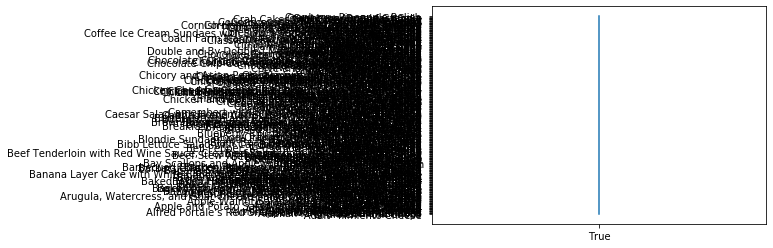

In [121]:
usa_cuisine_df = sample_df.loc[sample_df['usa_cuisine'] == 'True']
plt.plot(usa_cuisine_df['usa_cuisine'],usa_cuisine_df['title'])
plt.show()

## Classification

In [ ]:
# take out label/class column

X = sample_df.drop('usa_cuisine',axis=1)
Y = sample_df['usa_cuisine']
Y.head()

In [ ]:
from sklearn import preprocessing

# label encoder

le = preprocessing.LabelEncoder()
# convert bool into numbers

Y = le.fit_transform(Y) # 2 == True, 0 == False, 1 == NA
# print([x == 0 for x in Y])

from this link: https://www.geeksforgeeks.org/classifying-data-using-support-vector-machinessvms-in-python/

In [ ]:
from sklearn.datasets.samples_generator import make_blobs 

x,y = make_blobs(n_samples=100,centers=3,n_features=3)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='spring'); 
plt.show()  

### Multiple Label classifier

In [ ]:
from sklearn.svm import SVC # Support Vector Classifier

print(sample_df.shape)


In [ ]:
X = pd.DataFrame()
Y = pd.DataFrame()
X = df.drop('Crash Severity', axis=1)
X = X.drop('Seat Belt',axis=1)
Y['Crash Severity'] = df['Crash Severity']
Y['Seat Belt'] = df['Seat Belt']
print(Y.head())
X.head()

In [ ]:
from sklearn import preprocessing
# label encoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers

seat_belt_encoded = le.fit_transform(Y['Seat Belt'])
Y['Seat_Belt'] = seat_belt_encoded
crash_encoded = le.fit_transform(Y['Crash Severity'])
Y['Crash_Severity'] = crash_encoded
weather_encoded = le.fit_transform(X['Weather Condition'])
X['Weather_Condition'] = weather_encoded
driver_encoded = le.fit_transform(X['Driver Condition'])
X['Driver_Condition'] = driver_encoded
traffic_encoded = le.fit_transform(X['Traffic Violation'])
X['Traffic_Violation'] = traffic_encoded
print(Y.head())
# print(X.Weather_Condition)
X

In [ ]:
x = list(zip(X.Weather_Condition,X.Driver_Condition,X.Traffic_Violation))
# x
y = Y.Crash_Severity + Y.Seat_Belt
# print(y)
# y = list(zip(Y.Crash_Severity,Y.Seat_Belt))
# x
print(x[:5])
print("\n\n",y[:5])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=109)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# create a guassian classifier
model = GaussianNB()
# print(len(X_train))
# print(len(y_train))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)
# print(model.epsilon_)